![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Importación y definición de modelo XGB
from xgboost import XGBRegressor

In [35]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
#dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)
dataTraining[['Price', 'Year', 'Mileage']].describe()


### Precio Vs Make

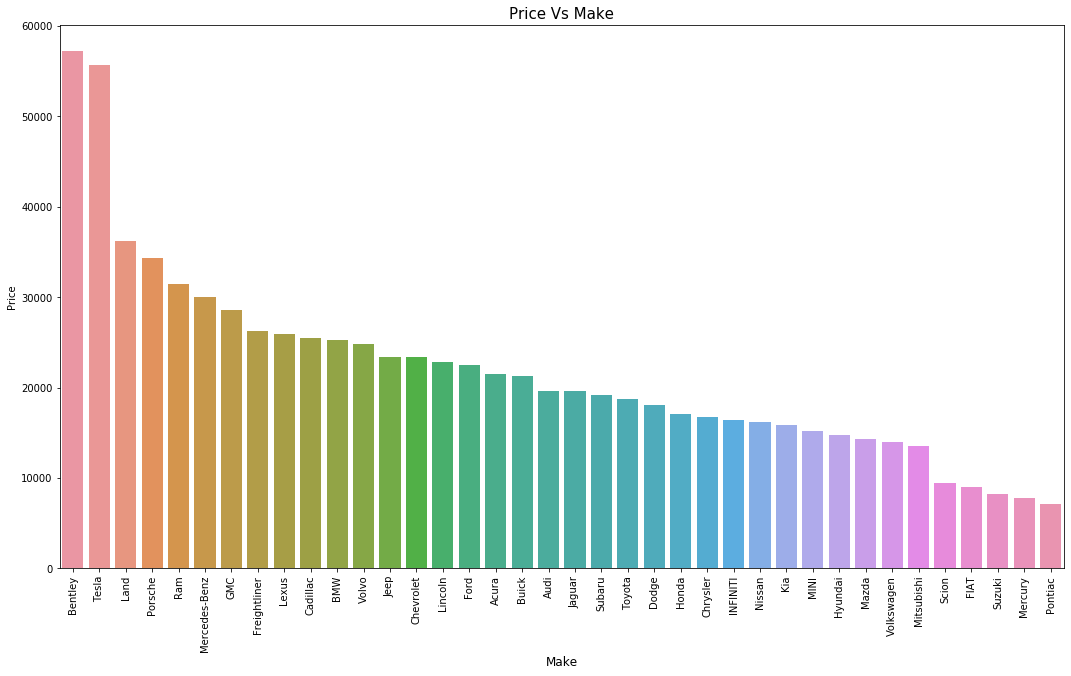

In [4]:
df1 = dataTraining.groupby(['Make']).agg({'Price':'mean'}).reset_index()
plt.figure(figsize=(18,10))

fig1 = sns.barplot(x = 'Make', y = 'Price', data = df1, order=df1.sort_values('Price', ascending=False)['Make'], ci = 0)
fig1.set_xticklabels(fig1.get_xticklabels() , rotation=90);
plt.ylabel("Price")
plt.xlabel("Make", size=12)
plt.title("Price Vs Make", size=15)
# Show the plot
plt.show()

## Price Vs State

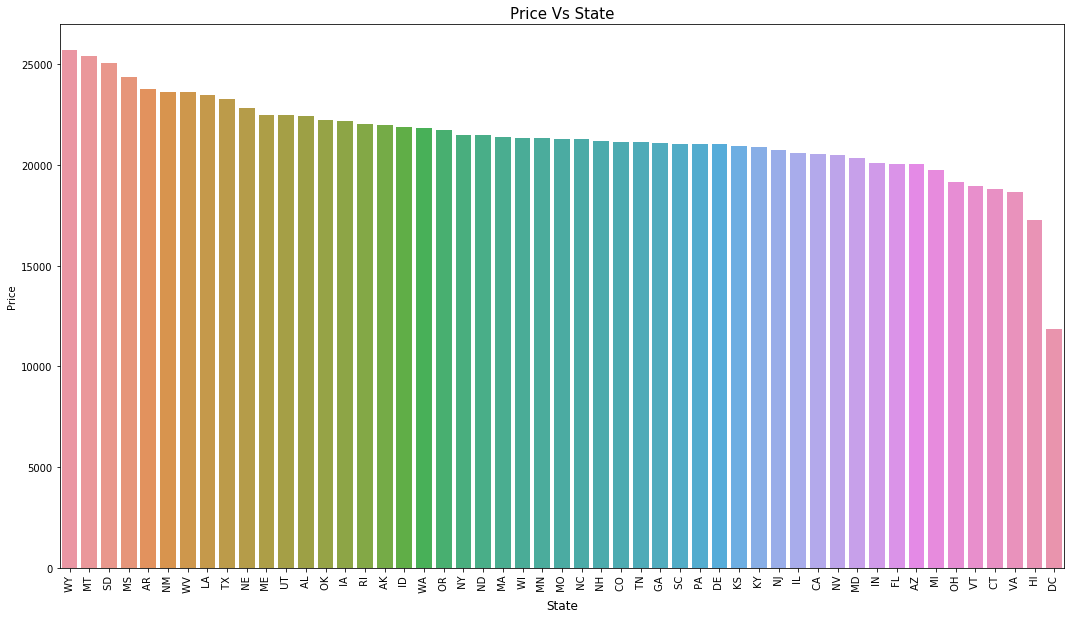

In [5]:
df1 = dataTraining.groupby(['State']).agg({'Price':'mean'}).reset_index()
plt.figure(figsize=(18,10))

fig1 = sns.barplot(x = 'State', y = 'Price', data = df1, order=df1.sort_values('Price', ascending=False)['State'], ci = 0)
fig1.set_xticklabels(fig1.get_xticklabels() , rotation=90);
plt.ylabel("Price")
plt.xlabel("State", size=12)
plt.title("Price Vs State", size=15)
# Show the plot
plt.show()

### Price

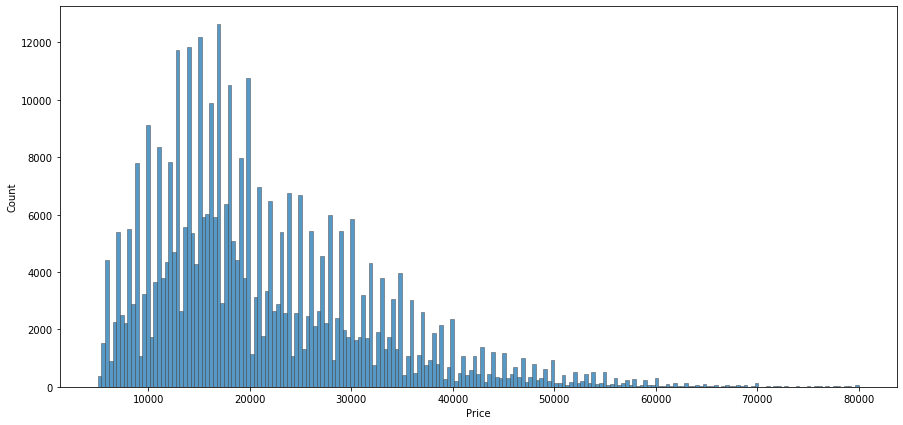

In [6]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    dataTraining,
    x="Price", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)


## Log Price

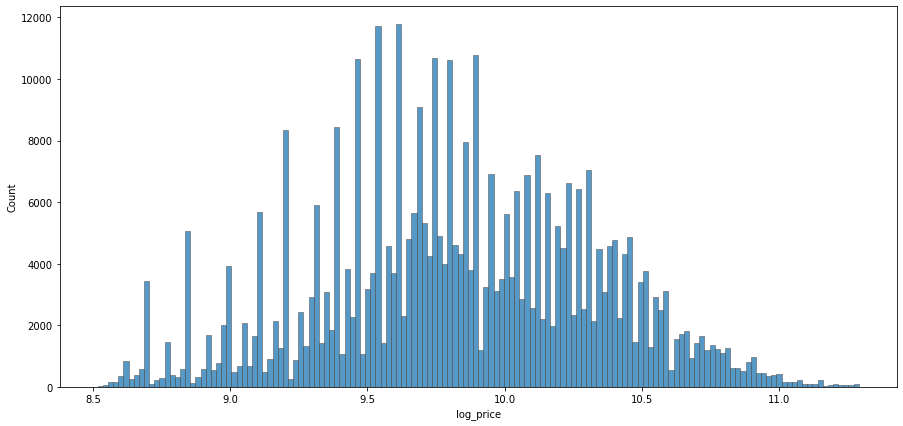

In [36]:
dataTraining['log_price'] = np.log(dataTraining['Price'])
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    dataTraining,
    x="log_price", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

### Mileage

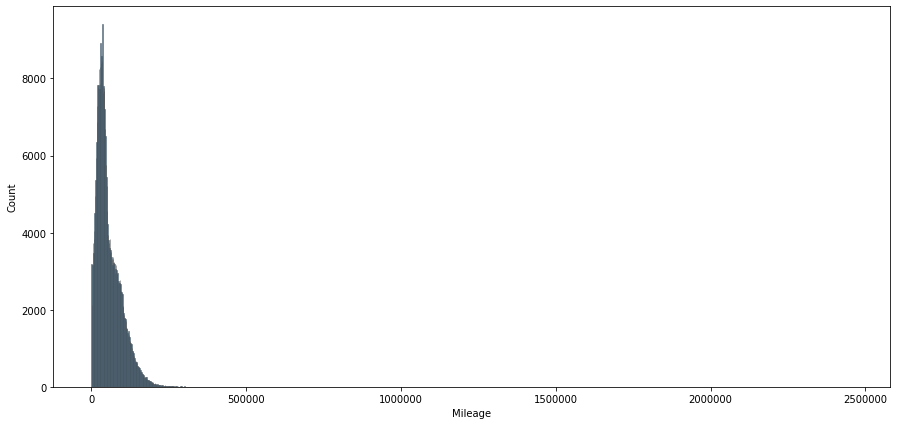

In [8]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    dataTraining,
    x="Mileage", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

### Log Mileage

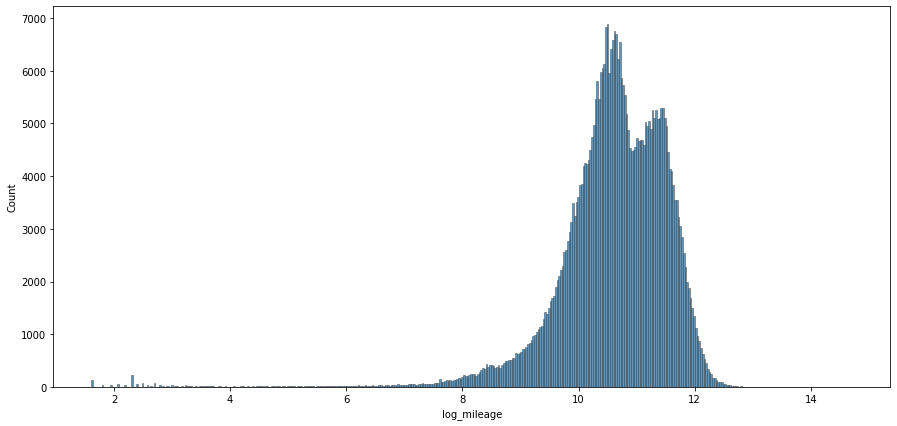

In [37]:
dataTraining['log_mileage'] = np.log(dataTraining['Mileage'])
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    dataTraining,
    x="log_mileage", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

### Year

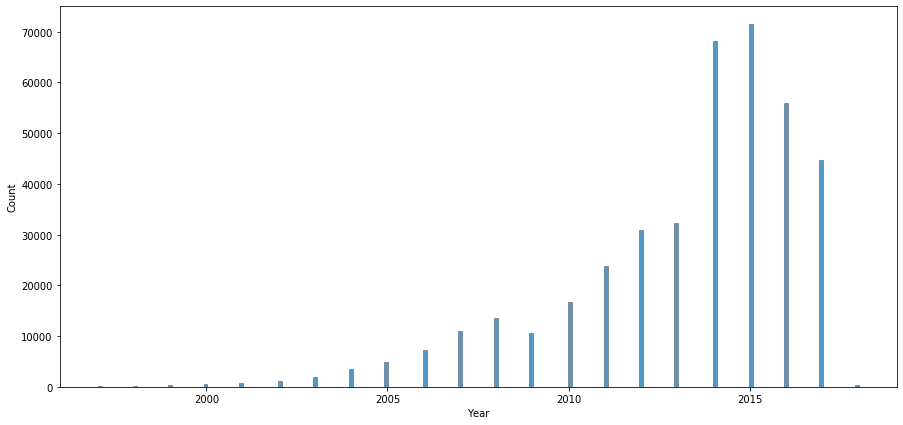

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    dataTraining,
    x="Year", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

### Price Vs Mileage

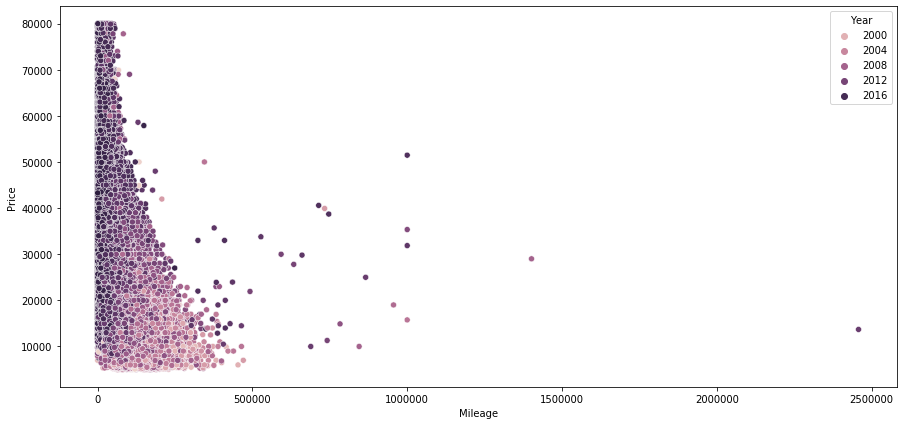

In [28]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(data=dataTraining, x="Mileage", y="Price", hue="Year")

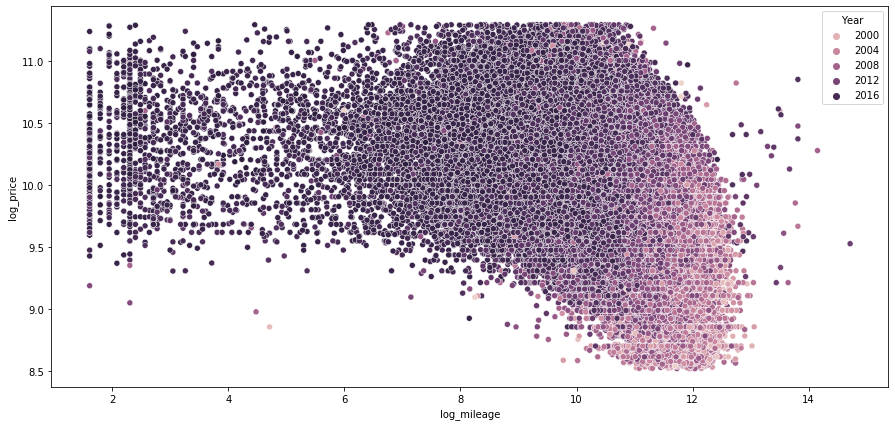

In [20]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(data=dataTraining, x="log_mileage", y="log_price", hue="Year")

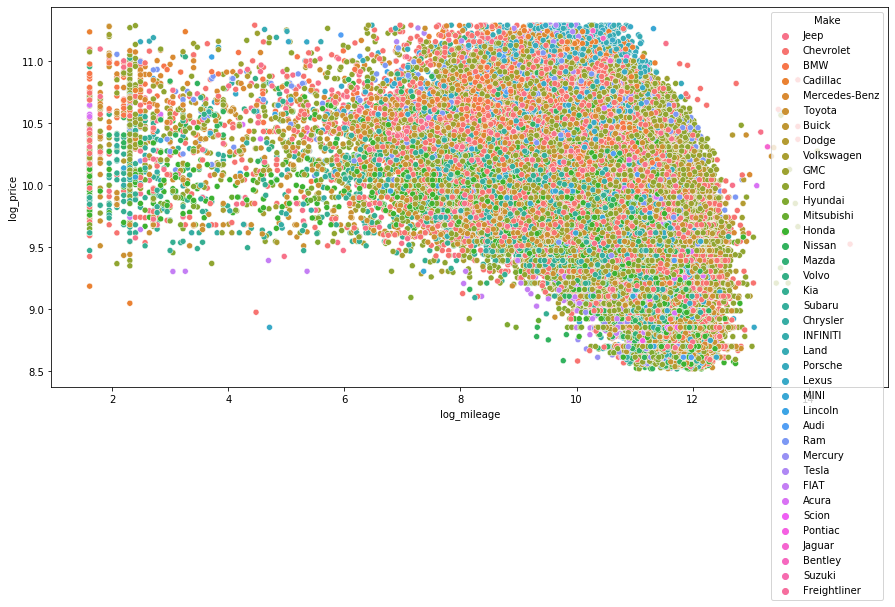

In [22]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(data=dataTraining, x="log_mileage", y="log_price", hue="Make")

### Escalamiento de variables

In [24]:
from sklearn import preprocessing

x = dataTraining[['Price', 'Year', 'Mileage']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Price', 'Year', 'Mileage'])


### Price Vs Year (scaled)

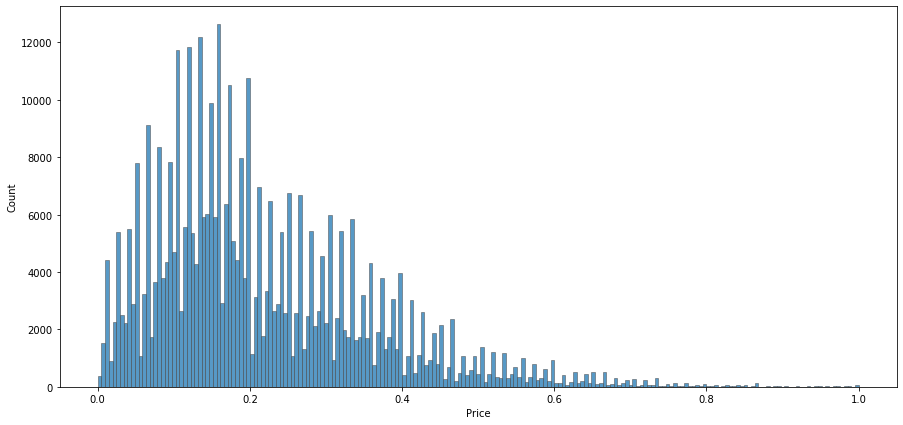

In [25]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    df_scaled,
    x="Price", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

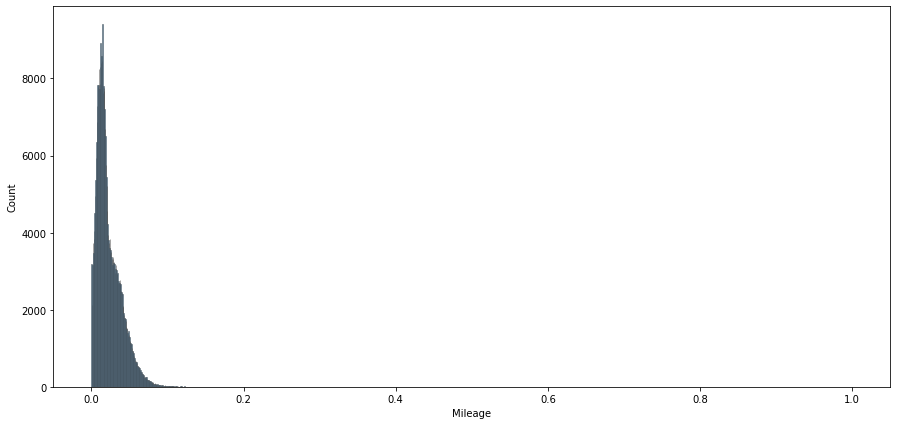

In [26]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    df_scaled,
    x="Mileage", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

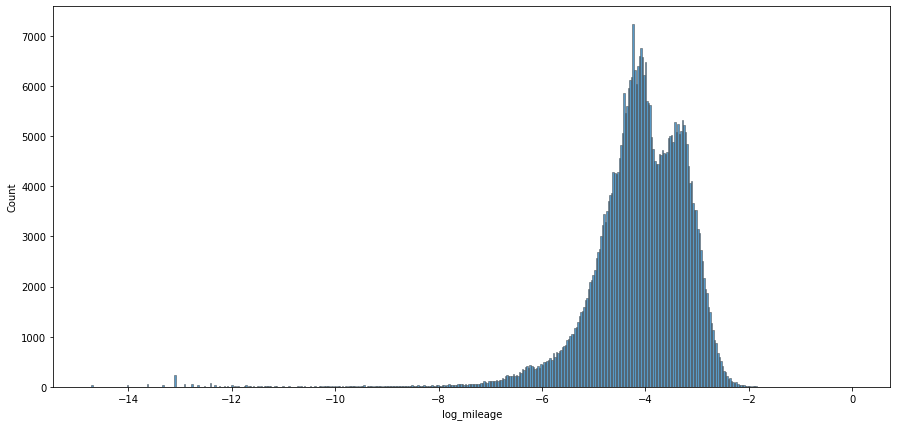

In [27]:
df_scaled['log_mileage'] = np.log(df_scaled['Mileage'])
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    df_scaled,
    x="log_mileage", #hue="Year",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

### Probando re-categorizaciones

In [55]:
model_premium = dataTraining.groupby(['Model']).agg({'Price':'mean', 'State' :'count'}).reset_index()
model_premium['premium'] = np.select( 
    #si la media del precio es mayor al percentil 75, es un auto premium
    [model_premium['Price'] >= dataTraining['Price'].quantile(.75)],
    [1], default = 0 )

model_premium['popular'] = np.select( 
    #si el conteo del modelo es mayor al conteo de la media
    [model_premium['State'] < model_premium['State'].mean() * 0.1],
    [0], default = 1 )
#model_premium

df_recat = pd.merge(dataTraining, model_premium[['Model','premium', 'popular']], on='Model')

In [137]:
dataTraining.describe()

,Price,State,Make,Model,Year,Mileage,make_model
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,21146.919312,24.034658,15.833530,254.827082,0.771339,0.022405,6.437720
std,10753.664940,15.325588,10.299097,148.634414,0.156777,0.016633,2.536653
min,5001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13499.000000,9.000000,8.000000,124.000000,0.714286,0.010512,4.000000
50%,18450.000000,24.000000,13.000000,248.000000,0.809524,0.017475,6.000000
75%,26999.000000,39.000000,20.000000,404.000000,0.904762,0.031503,9.000000
max,79999.000000,50.000000,37.000000,524.000000,1.000000,1.000000,10.000000


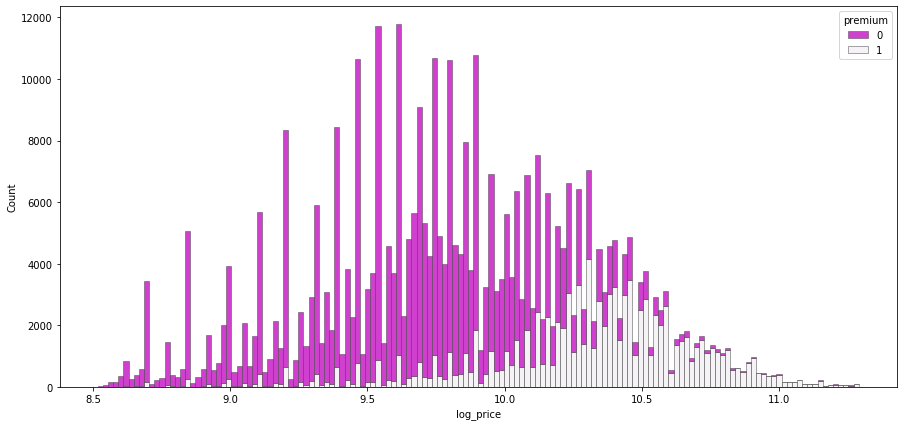

In [42]:
fig, ax = plt.subplots(figsize=(15,7))

sns.histplot(
    df_recat,
    x="log_price", hue="premium",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

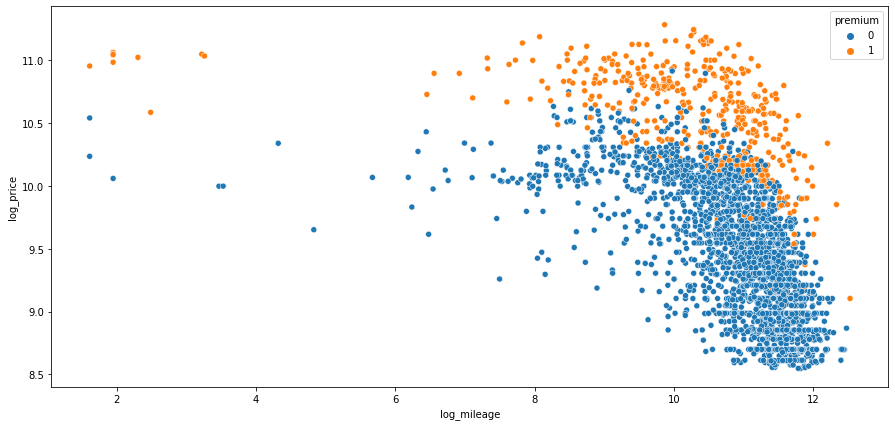

In [58]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(data=df_recat[df_recat['popular'] == 0] , x="log_mileage", y="log_price", hue="premium")

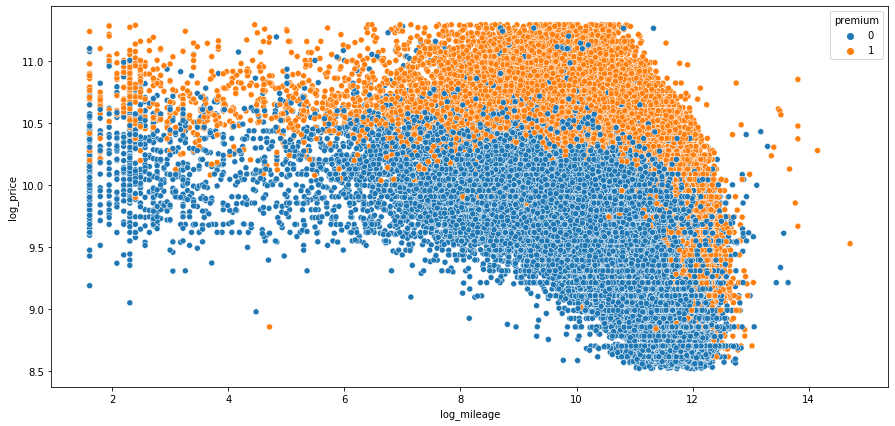

In [59]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(data=df_recat[df_recat['popular'] == 1] , x="log_mileage", y="log_price", hue="premium")

In [60]:
df_recat

,Price,Year,Mileage,State,Make,Model,log_price,log_mileage,premium,popular
0,34995,2017,9913,FL,Jeep,Wrangler,10.462960,9.201602,1,1
1,26998,2013,64032,CO,Jeep,Wrangler,10.203518,11.067138,1,1
2,23000,2011,75384,OH,Jeep,Wrangler,10.043249,11.230350,1,1
3,30465,2014,56030,OK,Jeep,Wrangler,10.324334,10.933643,1,1
4,31250,2014,21033,OK,Jeep,Wrangler,10.349775,9.953848,1,1
...,...,...,...,...,...,...,...,...,...,...
399995,5999,2006,120400,VA,Mazda,RX-84dr,8.699348,11.698575,0,0
399996,8994,2009,92628,CA,Mazda,RX-84dr,9.104313,11.436347,0,0
399997,8900,2005,51202,TX,Mazda,RX-84dr,9.093807,10.843534,0,0
399998,6999,2008,111094,GA,Mazda,RX-84dr,8.853523,11.618132,0,0


In [365]:
dataTraining = pd.merge(dataTraining, model_premium[['Model','premium', 'popular']], on='Model')
#dataTraining['premium_popular'] = dataTraining['premium'] + dataTraining['popular']
dataTraining

,Price,Year,Mileage,State,Make,Model,premium,popular
0,34995,2017,9913,FL,Jeep,Wrangler,1,1
1,26998,2013,64032,CO,Jeep,Wrangler,1,1
2,23000,2011,75384,OH,Jeep,Wrangler,1,1
3,30465,2014,56030,OK,Jeep,Wrangler,1,1
4,31250,2014,21033,OK,Jeep,Wrangler,1,1
...,...,...,...,...,...,...,...,...
399995,5999,2006,120400,VA,Mazda,RX-84dr,0,0
399996,8994,2009,92628,CA,Mazda,RX-84dr,0,0
399997,8900,2005,51202,TX,Mazda,RX-84dr,0,0
399998,6999,2008,111094,GA,Mazda,RX-84dr,0,0


In [66]:
def analizar_violinplot(columnas_analizar, df_target, eje_y):
    fig, ax = plt.subplots(len(columnas_analizar), 1, figsize =(15,7))
    fig.tight_layout()


    for i, var in enumerate(columnas_analizar):
        sns.violinplot(x= var, y=eje_y, data = df_target, ax=ax[i])
        ax[i].tick_params(axis='x', labelrotation=90)

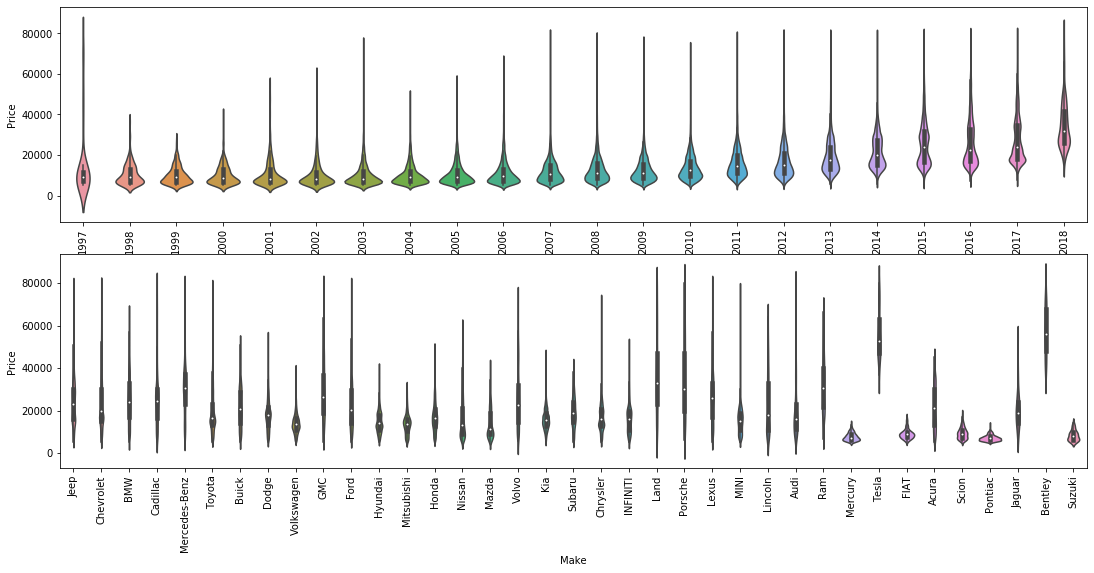

In [381]:
cols = [ 'Year', 'Make']
df_t = dataTraining[['Price', 'Make', 'Year']]
analizar_violinplot(cols, df_t, 'Price')

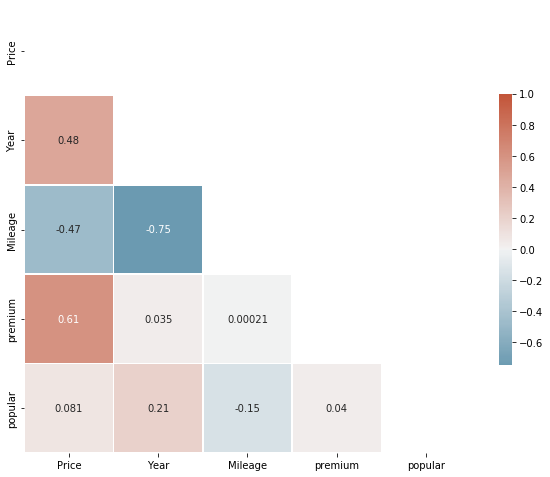

In [173]:
df_correlation = dataTraining[['Price', 'Year', 'Mileage', 'premium', 'popular']].corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Modelos de regresion

In [61]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')


In [62]:
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [125]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')


#escalamiento del dataset
scaler = StandardScaler()
x = dataTraining[['Year', 'Mileage']].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Year', 'Mileage'])

dataTraining = pd.concat([dataTraining[['Price', 'State', 'Make', 'Model']], df_scaled], axis=1, join="inner")
dataTraining


,Price,State,Make,Model,Year,Mileage
0,34995,FL,Jeep,Wrangler,1.154770,-1.104669
1,37895,OH,Chevrolet,Tahoe4WD,0.547296,-0.843790
2,18430,TX,BMW,X5AWD,-0.363915,0.700645
3,24681,OH,Cadillac,SRXLuxury,0.243559,-0.644406
4,26998,CO,Jeep,Wrangler,-0.060178,0.219149
...,...,...,...,...,...,...
399995,29900,TX,Lexus,RXRX,0.547296,-0.728602
399996,17688,MI,Chevrolet,EquinoxFWD,0.547296,-0.914752
399997,24907,NC,Buick,EnclaveLeather,0.243559,0.284119
399998,11498,IN,Volkswagen,Jetta,0.243559,-0.420757


In [126]:

model_premium = dataTraining.groupby(['Model']).agg({'Price':'mean', 'State' :'count'}).reset_index()
model_premium['premium'] = np.select( 
    #si la media es mayor al percentil 70, es un auto premium
    [model_premium['Price'] >= dataTraining['Price'].quantile(.75)],
    [1], default = 0 )

model_premium['popular'] = np.select( 
    #si el conteo del modelo es mayor al conteo de la media
    [model_premium['State'] < model_premium['State'].mean() * 0.1],
    [0], default = 1 )
#dataTraining = pd.merge(dataTraining, model_premium[['Model','premium', 'popular']], on='Model')

#elimino este fabricante porque no estaba en el conjunto de test
dataTraining = dataTraining[dataTraining['Make'] != 'Freightliner']

#dataTraining_dummy = pd.get_dummies(dataTraining.drop(['Model', 'State'], axis=1), drop_first = True)
#dataTraining_dummy = pd.get_dummies(dataTraining.drop(['State'], axis=1), drop_first = True)
dataTraining_dummy = pd.get_dummies(dataTraining, drop_first = True)

dataTraining_dummy['log_price'] = np.log(dataTraining_dummy['Price'])
#dataTraining_dummy['log_mileage'] = np.log(dataTraining_dummy['Mileage'])

# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining_dummy['log_price']
#X = dataTraining_dummy.drop(['Price', 'log_price', 'Mileage'], axis=1)
X = dataTraining_dummy.drop(['Price', 'log_price'], axis=1)


# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [130]:
X_train.head()

,Year,Mileage,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
232051,0.243559,-0.375015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33252,0.851033,-0.302780,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
63781,-2.490074,0.793011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75880,-4.008758,1.123654,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
267246,-0.667652,0.571587,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### XGBoost

In [128]:

modelo = XGBRegressor(
    n_estimators=380, 
    learning_rate = 0.2, 
    gamma = 2, 
    max_depth=6, 
    eta=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8)

# fit model
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)


0.026678911502626204

In [129]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))


3927.8633434442877

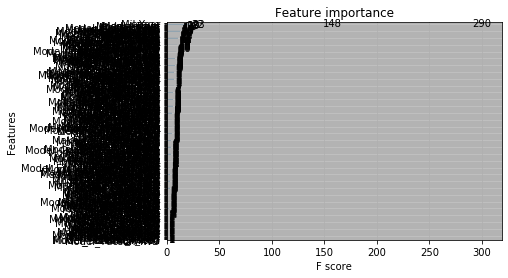

In [124]:
from xgboost import plot_importance

plot_importance(modelo)

In [93]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

df_total = pd.concat([dataTraining,dataTesting])

le_state = preprocessing.LabelEncoder()
le_make = preprocessing.LabelEncoder()
le_model = preprocessing.LabelEncoder()

df_total["State"] = le_state.fit_transform(df_total["State"])
df_total["Make"] = le_make.fit_transform(df_total["Make"])
df_total["Model"] = le_model.fit_transform(df_total["Model"])

x = dataTraining[['Year', 'Mileage']].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Year', 'Mileage'])

dataTraining = pd.concat([dataTraining[['Price', 'State', 'Make', 'Model']], df_scaled], axis=1, join="inner")

dataTraining["State"] = le_state.transform(dataTraining["State"])
dataTraining["Make"] = le_make.transform(dataTraining["Make"])
dataTraining["Model"] = le_model.transform(dataTraining["Model"])

# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)

# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1111)

modelo = XGBRegressor(
    n_estimators=550, 
    learning_rate = 0.6, 
    gamma = 2, 
    subsample=0.8, 
    colsample_bytree=0.8)

# fit model
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)


13480784.002519218

In [94]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3671.61871693116

Best learning_rate value = 0.6000000000000001, accuracy = 13023976.053706516


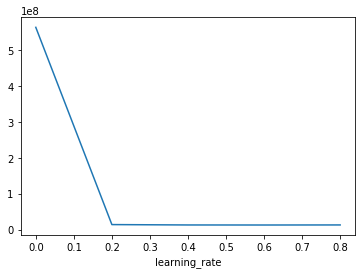

In [78]:
# Definir valores posibles de parámetros
lrate = np.arange(0, 1, 0.2)

lr_accuracy_scores = []
for n in lrate:
    clf = XGBRegressor(learning_rate=n, random_state=1, n_jobs=-1)
    lr_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()*(-1))

plot_Accuracy(lrate, lr_accuracy_scores, param_name = "learning_rate")

Best learning_rate value = 0.6000000000000001, accuracy = 13023976.053706516


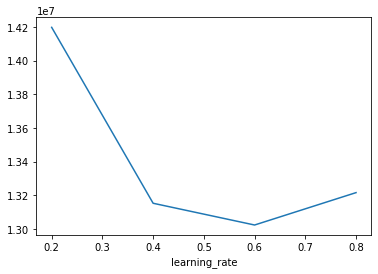

In [79]:
plot_Accuracy(lrate[1:], lr_accuracy_scores[1:], param_name = "learning_rate")

Best gamma value = 2, accuracy = 13023976.053706516


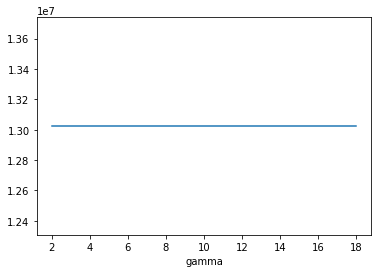

In [80]:
gamma = range(2, 20, 4)
gamma_accuracy_scores = []
for n in gamma:
    clf = XGBRegressor(learning_rate=0.6, gamma = n, random_state=1, n_jobs=-1)
    gamma_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()*(-1))

plot_Accuracy(gamma, gamma_accuracy_scores, param_name = "gamma")

Best colsample value = 0.8, accuracy = 13023162.826782811


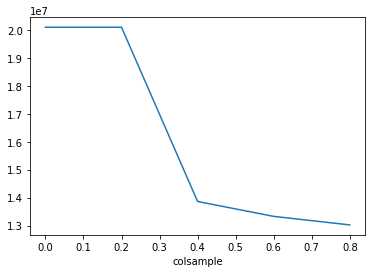

In [83]:
colsample = np.arange(0, 1, 0.2)

colsample_accuracy_scores = []
for n in colsample:
    clf = XGBRegressor(learning_rate=0.6, gamma = 2, colsample_bytree=n, random_state=1, n_jobs=-1)
    colsample_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()*(-1))

plot_Accuracy(colsample, colsample_accuracy_scores, param_name = "colsample")

### XGBoost - Calibracion de parametros

In [405]:
import warnings
warnings.filterwarnings('ignore')
# Definir valores posibles de parámetros

param_test1 = {
 'learning_rate':np.arange(0, 0.3, 0.1),
 'gamma':range(2, 4 , 2),
 'n_estimators':range(500,800,100)

}

gsearch1 = GridSearchCV(estimator = XGBRegressor(), 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5 )

gsearch1.fit(X_train, y_train)

exception calling callback for <Future at 0x7f9cc4dcdb50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/jsdelgadoc/opt/anaconda3/lib/python3.7/site-packages/joblib/

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [342]:
gsearch1.best_params_

{'gamma': 2, 'learning_rate': 0.1, 'n_estimators': 500}

In [343]:
gsearch1.best_score_

-35708740.01394916

### Random Forest

In [139]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

df_total = pd.concat([dataTraining,dataTesting])

le_state = preprocessing.LabelEncoder()
le_make = preprocessing.LabelEncoder()
le_model = preprocessing.LabelEncoder()

df_total["State"] = le_state.fit_transform(df_total["State"])
df_total["Make"] = le_make.fit_transform(df_total["Make"])
df_total["Model"] = le_model.fit_transform(df_total["Model"])

df_total


,Price,Year,Mileage,State,Make,Model
0,34995.0,2017,9913,9,17,489
1,37895.0,2015,20578,35,6,448
2,18430.0,2012,83716,43,2,499
3,24681.0,2014,28729,35,5,398
4,26998.0,2013,64032,5,17,489
...,...,...,...,...,...,...
99995,NaN,2015,82719,43,12,401
99996,NaN,2015,19711,44,2,27
99997,NaN,2016,48049,4,27,305
99998,NaN,2017,15306,5,17,343


In [140]:
x = dataTraining[['Year', 'Mileage']].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Year', 'Mileage'])

dataTraining = pd.concat([dataTraining[['Price', 'State', 'Make', 'Model']], df_scaled], axis=1, join="inner")
dataTraining


,Price,State,Make,Model,Year,Mileage
0,34995,FL,Jeep,Wrangler,0.952381,0.004031
1,37895,OH,Chevrolet,Tahoe4WD,0.857143,0.008370
2,18430,TX,BMW,X5AWD,0.714286,0.034059
3,24681,OH,Cadillac,SRXLuxury,0.809524,0.011687
4,26998,CO,Jeep,Wrangler,0.761905,0.026050
...,...,...,...,...,...,...
399995,29900,TX,Lexus,RXRX,0.857143,0.010286
399996,17688,MI,Chevrolet,EquinoxFWD,0.857143,0.007190
399997,24907,NC,Buick,EnclaveLeather,0.809524,0.027131
399998,11498,IN,Volkswagen,Jetta,0.809524,0.015407


In [141]:
#le_state = preprocessing.LabelEncoder()
#le_make = preprocessing.LabelEncoder()
#le_model = preprocessing.LabelEncoder()

dataTraining["State"] = le_state.transform(dataTraining["State"])
dataTraining["Make"] = le_make.transform(dataTraining["Make"])
dataTraining["Model"] = le_model.transform(dataTraining["Model"])


dataTraining

,Price,State,Make,Model,Year,Mileage
0,34995,9,17,489,0.952381,0.004031
1,37895,35,6,448,0.857143,0.008370
2,18430,43,2,499,0.714286,0.034059
3,24681,35,5,398,0.809524,0.011687
4,26998,5,17,489,0.761905,0.026050
...,...,...,...,...,...,...
399995,29900,43,20,377,0.857143,0.010286
399996,17688,22,6,158,0.857143,0.007190
399997,24907,27,4,154,0.809524,0.027131
399998,11498,15,36,264,0.809524,0.015407


In [98]:
# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining['log_price']
#X = dataTraining_dummy.drop(['Price', 'log_price', 'Mileage'], axis=1)
X = dataTraining.drop(['Price','log_price'], axis=1)

# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1111)



In [101]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor( n_estimators = 250, max_depth=17,  max_features = 3 ,random_state=1, n_jobs=-1)
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)

0.023387572667254983

In [102]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred) ))


3619.4152294394607

Best n_estimators value = 100, accuracy = 0.024643035576099523


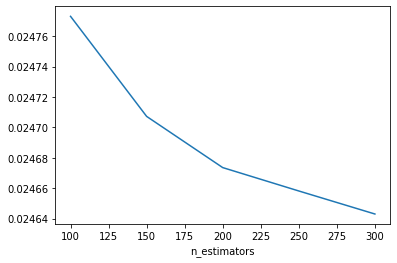

In [56]:
from sklearn.model_selection import cross_val_score

# Definir el número de features
n_features = X.shape[1]

# Definir función para graficar el accuracy vs parametro
def plot_Accuracy(param_Range, scores, param_name = "N"):
    plt.plot(param_Range, scores)
    plt.xlabel(param_name)
    vals_dict = {p:v for p,v in zip(param_Range, scores)}
    worst_to_best = sorted(vals_dict, key = lambda x: vals_dict[x])
    print(f"Best {param_name} value = {worst_to_best[-1]}, accuracy = {min(scores)}")

    
# Definir valores posibles de parámetros
estimators = range(100, 301, 50)

# Estimar el mejor valor de n_estimators
estimators_accuracy_scores = []
for n in estimators:
    clf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    estimators_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean() *(-1))

plot_Accuracy(estimators, estimators_accuracy_scores, param_name = "n_estimators")

ValueError: x and y must have same first dimension, but have shapes (5,) and (9,)

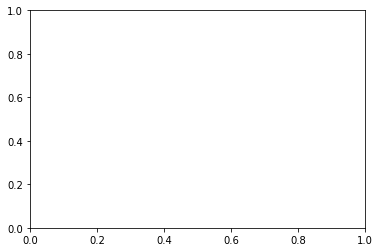

In [57]:
depths = range(2, 20, 2)

# Estimar el mejor valor de n_estimators
estimators_accuracy_scores = []
for n in depths:
    clf = RandomForestRegressor(n_estimators = 250, max_depth=n, random_state=1, n_jobs=-1)
    estimators_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean() *(-1))

plot_Accuracy(estimators, estimators_accuracy_scores, param_name = "depths")

Best depths value = 18, accuracy = 0.022874474830632912


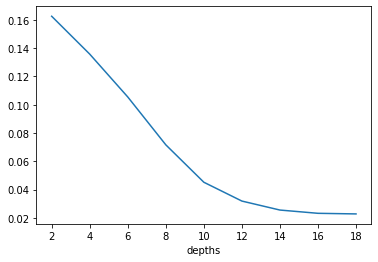

In [58]:
# Definir función para graficar el accuracy vs parametro
def plot_Accuracy(param_Range, scores, param_name = "N"):
    plt.plot(param_Range, scores)
    plt.xlabel(param_name)
    vals_dict = {p:v for p,v in zip(param_Range, scores)}
    worst_to_best = sorted(vals_dict, key = lambda x: vals_dict[x])
    print(f"Best {param_name} value = {worst_to_best[0]}, accuracy = {min(scores)}")
    
plot_Accuracy(depths, estimators_accuracy_scores, param_name = "depths")

In [59]:
estimators_accuracy_scores

[0.16243525070130946,
 0.13570177979722547,
 0.10545158632691545,
 0.07165495479821302,
 0.04523219758815204,
 0.03194621247131191,
 0.02560325218832753,
 0.023300698860179426,
 0.022874474830632912]

In [63]:
np.sqrt(np.exp(0.022874474))

1.0115028922612768

In [ ]:
# Estimar el mejor valor de n_estimators
estimators_accuracy_scores = []
for n in depths:
    clf = RandomForestRegressor(n_estimators = 250, max_depth=n, random_state=1, n_jobs=-1)
    estimators_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean() *(-1))

plot_Accuracy(estimators, estimators_accuracy_scores, param_name = "depths")

In [ ]:
features = range(1, n_features+1)

# Estimar el mejor valor de n_estimators
estimators_accuracy_scores = []
for n in features:
    clf = RandomForestRegressor(n_estimators = 250, max_depth=17,  max_features = n ,random_state=1, n_jobs=-1)
    estimators_accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean() *(-1))

plot_Accuracy(features, estimators_accuracy_scores, param_name = "features")

In [30]:
estimators_accuracy_scores

[17512839.301744442,
 13465663.096314985,
 12874277.122879166,
 12879509.130559789,
 13081232.81281636]

### Suport Vector Machine

In [ ]:
# Ajustar la regresión con el dataset
from sklearn.svm import SVR
modelo = SVR(kernel = "rbf")
modelo.fit(X_train, y_train)

y_pred = modelo_rf.modelo(X_test)

metrics.mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))


## Predict Test

In [88]:
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)
# Visualización datos de test
#dataTesting.head()

dataTesting = pd.merge(dataTesting, model_premium[['Model','premium', 'popular']], on='Model')
#dataTesting_dummy = pd.get_dummies(dataTesting.drop(['Model', 'State'], axis=1), drop_first = True)
dataTesting_dummy = pd.get_dummies(dataTesting.drop(['State'], axis=1), drop_first = True)
dataTesting_dummy['log_mileage'] = np.log(dataTesting_dummy['Mileage'])
dataTesting_dummy = dataTesting_dummy.drop(['Mileage'], axis=1)
dataTesting_dummy


,Year,premium,popular,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr,log_mileage
0,2014,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.370643
1,2014,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.500867
2,2011,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.224520
3,2015,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.577965
4,2011,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.587402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.471242
99996,2015,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.746455
99997,2010,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.505649
99998,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.803181


In [40]:
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)
x_test = dataTesting[['Year', 'Mileage']].values #returns a numpy array
x_encoding_test = min_max_scaler.transform(x_test)
df_encoding_test = pd.DataFrame(x_encoding_test, columns=['Year', 'Mileage'])

dataTesting = pd.concat([dataTesting[['State', 'Make', 'Model']], df_encoding_test], axis=1, join="inner")
dataTesting["State"] = le_state.transform(dataTesting["State"])
dataTesting["Make"] = le_make.transform(dataTesting["Make"])
dataTesting["Model"] = le_model.transform(dataTesting["Model"])

dataTesting


,State,Make,Model,Year,Mileage
0,20,27,305,0.809524,0.012981
1,9,17,489,0.952381,0.002180
2,35,10,211,0.809524,0.020463
3,47,2,27,0.333333,0.053769
4,19,17,248,0.857143,0.010262
...,...,...,...,...,...
99995,43,12,401,0.857143,0.033653
99996,44,2,27,0.857143,0.008018
99997,4,27,305,0.904762,0.019547
99998,5,17,343,0.952381,0.006225


In [43]:
#y_pred_test = modelo.predict(dataTesting_dummy)
y_pred_test = modelo_rf.predict(dataTesting)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.rename(columns={0:'Price'},inplace = True)
y_pred_test


,Price
0,20839.006375
1,37228.327712
2,23237.386520
3,9384.783246
4,31087.862501
...,...
99995,21102.707285
99996,39530.966471
99997,23867.570381
99998,16593.064655


In [44]:
y_pred_test.to_csv('submission.csv', index_label='ID')

In [83]:
make_test = pd.DataFrame(dataTesting.Model.unique())
make_test.rename(columns={0:'make_test'}, inplace = True)


make_train = pd.DataFrame(dTraining.Model.unique())
make_train.rename(columns={0:'make_train'}, inplace = True)

cruce = pd.merge(make_train, make_test, left_on = 'make_train', right_on='make_test', how='left')
cruce

NameError: name 'dTraining' is not defined

In [116]:
dataTraining_remote = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting_remote = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)


In [138]:
dataTraining_remote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [118]:
dataTraining = dataTraining_remote.copy()
dataTesting = dataTesting_remote.copy()

df_total = pd.concat([dataTraining,dataTesting])


In [119]:

df_group_state = df_total.groupby(['State'])['Price'].mean().reset_index()
df_group_state = df_group_state.sort_values(by=['Price'])

df_group_make = df_total.groupby(['Make'])['Price'].mean().reset_index()
df_group_make = df_group_make.sort_values(by=['Price'])

df_group_model = df_total.groupby(['Model'])['Price'].mean().reset_index()
df_group_model = df_group_model.sort_values(by=['Price'])



In [120]:
le_state = preprocessing.LabelEncoder()
le_make = preprocessing.LabelEncoder()
le_model = preprocessing.LabelEncoder()

df_group_state["State"] = le_state.fit_transform(df_group_state["State"])
df_group_make["Make"] = le_make.fit_transform(df_group_make["Make"])
df_group_model["Model"] = le_model.fit_transform(df_group_model["Model"])


In [121]:
x = dataTraining[['Year', 'Mileage']].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Year', 'Mileage'])

dataTraining = pd.concat([dataTraining[['Price', 'State', 'Make', 'Model']], df_scaled], axis=1, join="inner")

dataTraining["State"] = le_state.transform(dataTraining["State"])
dataTraining["Make"] = le_make.transform(dataTraining["Make"])
dataTraining["Model"] = le_model.transform(dataTraining["Model"])

# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)

# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1111)


In [112]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor( n_estimators = 350, max_depth=17,  max_features = 3 ,random_state=1, n_jobs=-1)
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)

12824177.486472491

In [113]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3581.0860763841592

,Price,State,Make,Model,Year,Mileage,make_model
0,34995,9,17,489,0.952381,0.004031,10
1,37895,35,6,448,0.857143,0.008370,10
2,18430,43,2,499,0.714286,0.034059,5
3,24681,35,5,398,0.809524,0.011687,9
4,26998,5,17,489,0.761905,0.026050,10
...,...,...,...,...,...,...,...
399995,29900,43,20,377,0.857143,0.010286,9
399996,17688,22,6,158,0.857143,0.007190,5
399997,24907,27,4,154,0.809524,0.027131,9
399998,11498,15,36,264,0.809524,0.015407,3


In [89]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)





In [122]:
dataTraining = dataTraining_remote.copy()
dataTesting = dataTesting_remote.copy()

df_total = pd.concat([dataTraining,dataTesting])

le_state = preprocessing.LabelEncoder()
le_make = preprocessing.LabelEncoder()
le_model = preprocessing.LabelEncoder()

df_total["State"] = le_state.fit_transform(df_total["State"])
df_total["Make"] = le_make.fit_transform(df_total["Make"])
df_total["Model"] = le_model.fit_transform(df_total["Model"])

x = dataTraining[['Year', 'Mileage']].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['Year', 'Mileage'])

dataTraining = pd.concat([dataTraining[['Price', 'State', 'Make', 'Model']], df_scaled], axis=1, join="inner")

dataTraining["State"] = le_state.transform(dataTraining["State"])
dataTraining["Make"] = le_make.transform(dataTraining["Make"])
dataTraining["Model"] = le_model.transform(dataTraining["Model"])

df = dataTraining.copy()
# Agrupar columnas 'Make' y 'Model' y obtener su precio promedio
grouped_dict = df.groupby(["Make", "Model"])["Price"].mean().to_dict()

# Obtener los percentiles para cada valor de precio promedio
models_values = [grouped_dict[key] for key in grouped_dict]
percentiles = [np.percentile(models_values, i) for i in range(10, 110, 10)]

# Generar valor de percentil para cada combinación "Make"-"Model"
for key in grouped_dict:
    value = grouped_dict[key]
    if value<percentiles[0]:
        grouped_dict[key] = 1
    elif value<percentiles[1]:
        grouped_dict[key] = 2
    elif value<percentiles[2]:
        grouped_dict[key] = 3
    elif value<percentiles[3]:
        grouped_dict[key] = 4
    elif value<percentiles[4]:
        grouped_dict[key] = 5
    elif value<percentiles[5]:
        grouped_dict[key] = 6
    elif value<percentiles[7]:
        grouped_dict[key] = 8
    elif value<percentiles[8]:
        grouped_dict[key] = 9
    else:
        grouped_dict[key] = 10
        
# Crear la columna "make-model" en el dataset
df["make_model"] = [(make, model) for make, model in zip(df["Make"], df["Model"])]

# Poblar la columna con el percentil correspondiente
df["make_model"] = [grouped_dict[i] for i in df["make_model"]]

dataTraining = df.copy()

# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)

# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


In [129]:
dataTraining

,Price,State,Make,Model,Year,Mileage,make_model
0,34995,9,17,489,0.952381,0.004031,10
1,37895,35,6,448,0.857143,0.008370,10
2,18430,43,2,499,0.714286,0.034059,5
3,24681,35,5,398,0.809524,0.011687,9
4,26998,5,17,489,0.761905,0.026050,10
...,...,...,...,...,...,...,...
399995,29900,43,20,377,0.857143,0.010286,9
399996,17688,22,6,158,0.857143,0.007190,5
399997,24907,27,4,154,0.809524,0.027131,9
399998,11498,15,36,264,0.809524,0.015407,3


In [133]:
df_makemodel = dataTraining.groupby(['Make','Model'])['make_model'].mean().reset_index()
df_makemodel[(df_makemodel['Make'] == 27) & (df_makemodel['Model'] == 338)]

,Make,Model,make_model
389,27,338,8.0


In [123]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor( n_estimators = 350, max_depth=17,  max_features = 3 ,random_state=1, n_jobs=-1)
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)

metrics.mean_squared_error(y_test, y_pred)

12469804.473052097

In [124]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3531.2610315653665

In [134]:
x_test = dataTesting[['Year', 'Mileage']].values #returns a numpy array
x_encoding_test = min_max_scaler.transform(x_test)
df_encoding_test = pd.DataFrame(x_encoding_test, columns=['Year', 'Mileage'])

dataTesting = pd.concat([dataTesting[['State', 'Make', 'Model']], df_encoding_test], axis=1, join="inner")
dataTesting["State"] = le_state.transform(dataTesting["State"])
dataTesting["Make"] = le_make.transform(dataTesting["Make"])
dataTesting["Model"] = le_model.transform(dataTesting["Model"])

dataTesting = pd.merge(dataTesting, df_makemodel, on=['Make', 'Model'])
dataTesting

,State,Make,Model,Year,Mileage,make_model
0,20,27,305,0.809524,0.012981,8.0
1,34,27,305,0.809524,0.014786,8.0
2,6,27,305,0.666667,0.011216,8.0
3,38,27,305,0.857143,0.005874,8.0
4,15,27,305,0.666667,0.043830,8.0
...,...,...,...,...,...,...
99995,4,30,131,0.666667,0.042471,4.0
99996,35,30,131,0.666667,0.026355,4.0
99997,43,6,317,0.142857,0.052348,1.0
99998,27,8,434,0.476190,0.003853,3.0


In [135]:
#y_pred_test = modelo.predict(dataTesting_dummy)
y_pred_test = modelo_rf.predict(dataTesting)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.rename(columns={0:'Price'},inplace = True)
y_pred_test

,Price
0,20921.626360
1,19171.018359
2,18576.691601
3,29711.566135
4,13373.526205
...,...
99995,12361.879127
99996,12781.244784
99997,6954.237533
99998,19245.800595


In [136]:
y_pred_test.to_csv('submission.csv', index_label='ID')